# Topic EDA 

In [7]:
import pickle
import pandas as pd 

#Visualizations
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt 


In [ ]:
df = pd.read_pickle('data/dominant_topic.pkl') 
df.head()

In [3]:
# distribution of topic
df.Dominant_Topic.value_counts(dropna=False)

NaN     2966
6.0      861
7.0      830
8.0      745
4.0      705
10.0     689
0.0      677
13.0     649
2.0      631
1.0      626
14.0     560
3.0      541
9.0      538
12.0     509
5.0      499
11.0     466
Name: Dominant_Topic, dtype: int64

In [4]:
df_distribution = df['Dominant_Topic'].value_counts().reset_index(name="Num Documents")
df_distribution.columns = ['Topics', 'Freq']
df_distribution

,Topics,Freq
0,6.0,861
1,7.0,830
2,8.0,745
3,4.0,705
4,10.0,689
5,0.0,677
6,13.0,649
7,2.0,631
8,1.0,626
9,14.0,560


In [5]:
# How many tweets are classified?
df_distribution['Freq'].sum()

9526

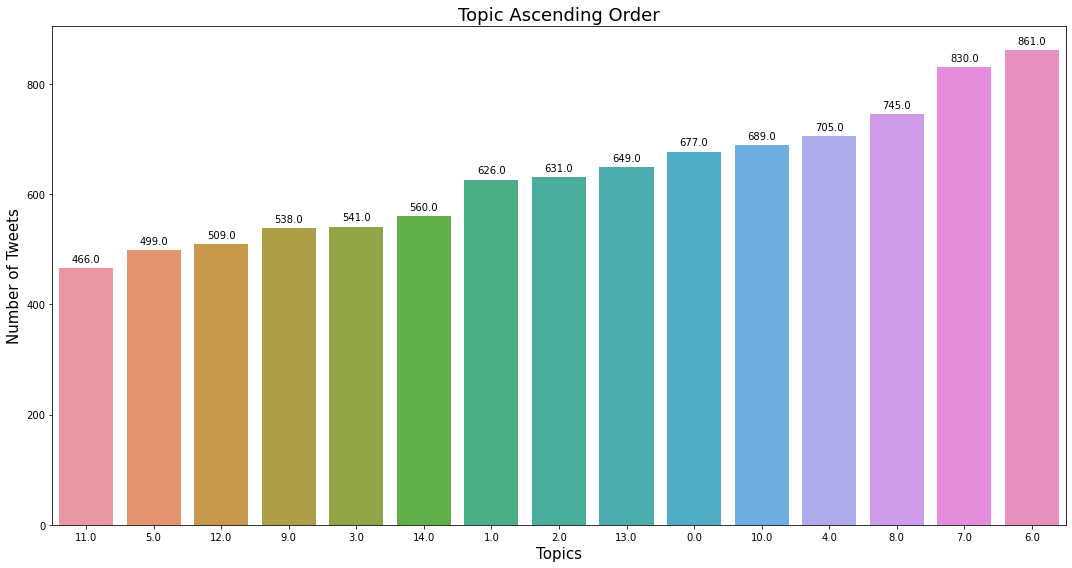

In [9]:
plt.figure(figsize=(15,8))
# make barplot and sort bars
ax= sns.barplot(x='Topics',
            y="Freq", 
            data=df_distribution, 
            order=df_distribution.sort_values('Freq').Topics)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
# set labels
plt.xlabel("Topics", size=15)
plt.ylabel("Number of Tweets", size=15)
plt.title("Topic Ascending Order", size=18)
plt.tight_layout()
#plt.savefig("sort_bars_in_barplot_ascending_order_Seaborn_Python.png", dpi=100)

# Qualitative Sentiment


In [29]:
# data
xls = pd.ExcelFile('data/tweets_topics_categorisation.xlsx')
quSent = pd.read_excel(xls, 'tweets_topics')
positive = pd.read_excel(xls, 'Positive', header=None,  names=[''])
negative = pd.read_excel(xls, 'Negative', header=None)

## Main text

In [30]:
# only 188 tweets were categorized
quSent = quSent[0:188]
quSent.tail()

,Unnamed: 0,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,Qualitative categorisation
183,4395.0,4395.0,13.0,0.9508,"saada, ostaa, myydä, alkoholi, käyttää, lailli...",kannabiksen laillistaminen lisää siihen liitty...,Negative
184,6832.0,6832.0,13.0,0.9508,"saada, ostaa, myydä, alkoholi, käyttää, lailli...",alkoholijuomilla on muitakin funkioita kuin nu...,Other
185,7641.0,7641.0,13.0,0.9508,"saada, ostaa, myydä, alkoholi, käyttää, lailli...",parempi olisi siis ostaa kannabiksensa asiantu...,Positive
186,9175.0,9175.0,13.0,0.9508,"saada, ostaa, myydä, alkoholi, käyttää, lailli...",pääkirjoitus: nykylain valossa lähes puolet nu...,Other
187,4693.0,4693.0,14.0,0.9508,"alkoholi, päihde, laillinen, tupakka, käyttö, ...",ootko huomannut että kannabis on laillistettu ...,Neutral


In [25]:
# I check out the categories in terms of how many tweets per topic/sentiment
quSent['Qualitative categorisation'].value_counts()

Other                56
Positive             42
Negative             33
Neutral              15
Other (humor)        12
Positive - Alco       8
Hemp                  5
MedCan                4
Other                 4
Negative - MedCan     2
Neutral - Alco        2
Positive - MedCan     2
Neutral - MedCan      1
Neutral               1
Name: Qualitative categorisation, dtype: int64

In [32]:
# how many topics have higher value?
# it might be good if you could add more for the topics at the bottom of the list
# How can we conclude it? The first 5-6 topic have stronger representative tweets..?
quSent.Dominant_Topic.value_counts()

0.0     20
13.0    19
10.0    17
1.0     16
6.0     16
4.0     16
5.0     15
2.0     12
8.0     12
12.0    11
7.0     10
11.0     8
14.0     8
9.0      5
3.0      3
Name: Dominant_Topic, dtype: int64

In [23]:
# I also create a matrix for topic vs sentiment but seems messy
pd.crosstab(quSent.Dominant_Topic, quSent['Qualitative categorisation'])

Qualitative categorisation,Hemp,MedCan,Negative,Negative - MedCan,Neutral,Neutral,Neutral - Alco,Neutral - MedCan,Other,Other,Other (humor),Positive,Positive - Alco,Positive - MedCan
Dominant_Topic,,,,,,,,,,,,,,
0.0,2,2,3,1,2,0,0,0,4,0,1,3,2,0
1.0,0,0,2,0,1,0,0,0,4,1,3,4,1,0
2.0,0,0,2,0,1,0,0,0,3,0,1,4,0,1
3.0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
4.0,0,1,4,0,0,0,0,0,3,1,1,5,0,0
5.0,0,0,2,0,1,0,1,1,3,0,0,5,2,0
6.0,0,0,1,1,2,0,1,0,6,0,1,4,0,0
7.0,1,0,4,0,1,1,0,0,3,0,0,0,0,0
8.0,0,0,5,0,2,0,0,0,0,0,0,4,1,0


## Positive

In [31]:
positive.head()

,0,1,2,3,4,5,6,7,8,9
0,7434.0,7434.0,1.0,0.9594,"psykoosi, olla, aiheuttaa, alkoholi, vaikuttaa...",ei ole myyrä ministeriössä. todella typerää pu...,Positive,harm reduction,tax revenue,NaN
1,7437.0,7437.0,1.0,0.9594,"psykoosi, olla, aiheuttaa, alkoholi, vaikuttaa...",olet oikeassa. estäminen ei vaan ole onnistunu...,Positive,Increased use despite criminalisation,tax revenue,NaN
2,3674.0,3674.0,2.0,0.9594,"maito, hamppu, elimistö, vihreä, laillistaa, s...",minusta tärkeintä tässä hetkessä on korjata pä...,Positive,human rights,support and treatment,NaN
3,8629.0,8629.0,8.0,0.9594,"kokeilla, ihminen, ei, ongelma, alkoholi, käyt...","se vasta passivoi, kun kannabiksen laittomuus ...",Positive,criminalisation leads to marginalisations,support and treatment,NaN
4,4186.0,4186.0,12.0,0.9594,"vaikutus, käyttö, käyttää, tutkimus, ongelma, ...","aloite lähtee siitä perusoletuksesta, että kan...",Positive,Increased use despite criminalisation,Harm reduction,NaN


In [37]:
positive.columns = ['Document_No', 'Document_No2', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text', 'Sentiment', 'Category', 'Category2','Undefined']
positive.head()

,Document_No,Document_No2,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,Sentiment,Category,Category2,Undefined
0,7434.0,7434.0,1.0,0.9594,"psykoosi, olla, aiheuttaa, alkoholi, vaikuttaa...",ei ole myyrä ministeriössä. todella typerää pu...,Positive,harm reduction,tax revenue,NaN
1,7437.0,7437.0,1.0,0.9594,"psykoosi, olla, aiheuttaa, alkoholi, vaikuttaa...",olet oikeassa. estäminen ei vaan ole onnistunu...,Positive,Increased use despite criminalisation,tax revenue,NaN
2,3674.0,3674.0,2.0,0.9594,"maito, hamppu, elimistö, vihreä, laillistaa, s...",minusta tärkeintä tässä hetkessä on korjata pä...,Positive,human rights,support and treatment,NaN
3,8629.0,8629.0,8.0,0.9594,"kokeilla, ihminen, ei, ongelma, alkoholi, käyt...","se vasta passivoi, kun kannabiksen laittomuus ...",Positive,criminalisation leads to marginalisations,support and treatment,NaN
4,4186.0,4186.0,12.0,0.9594,"vaikutus, käyttö, käyttää, tutkimus, ongelma, ...","aloite lähtee siitä perusoletuksesta, että kan...",Positive,Increased use despite criminalisation,Harm reduction,NaN


In [27]:
positive.shape

(51, 10)

In [38]:
# topic vs sentiment
pd.crosstab(positive.Dominant_Topic, positive.Sentiment)

Sentiment,Positive,Positive - Alco,Positive - MedCan
Dominant_Topic,,,
0.0,3,2,0
1.0,4,1,0
2.0,4,0,1
3.0,1,0,0
4.0,5,0,0
5.0,5,2,0
6.0,4,0,0
8.0,4,1,0
9.0,2,0,0


In [39]:
pd.crosstab(positive.Dominant_Topic, positive.Category)

Category,Better access to medical cannabis,Cannabis does not cause overdoses,Cannabis is a multipurpose plant,Cannabis is already available,Cannabis is safer than alcohol,Cannabis safer than alcohol,Decreased traffic accidents,Finnish quality,Focusing only on problems does not lead to anything,Free will,...,Regulation ensures quality control,Regulation has positive environmental impact,Separation of drug markets,Support and treatment,Tax revenue,Time to liberate,Unclear,criminalisation leads to marginalisations,harm reduction,human rights
Dominant_Topic,,,,,,,,,,,,,,,,,,,,,
0.0,0,0,0,0,1,1,0,0,0,0,...,2,0,0,1,0,0,0,0,0,0
1.0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2.0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3.0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4.0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,3,0,1,0,0,0
5.0,0,0,1,0,2,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
6.0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
8.0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
9.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [40]:
pd.crosstab(positive.Dominant_Topic, positive.Category2)

Category2,Harm reduction,Regulation ensures quality control,Tax revenue,support and treatment,tax revenue
Dominant_Topic,,,,,
1.0,0,0,0,0,2
2.0,0,0,0,1,0
4.0,0,0,1,0,0
8.0,0,1,0,1,0
10.0,0,0,1,0,0
12.0,1,0,0,0,0
13.0,1,0,0,0,0


## Negative

In [43]:
negative.columns = ['Document_No', 'Document_No2', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text', 'Sentiment', 'Category', 'Undefined']
negative.head()

,Document_No,Document_No2,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,Sentiment,Category,Undefined
0,7438.0,7438.0,1.0,0.9594,"psykoosi, olla, aiheuttaa, alkoholi, vaikuttaa...",on ne ainakin sellaisia. että useilla aluella...,Negative,Increased use,NaN
1,3602.0,3602.0,0.0,0.9576,"myynti, käyttö, kieltolaki, haitto, laillinen,...",itse päihdekuntoutusyksikössä työskentelevänä ...,Negative - MedCan,Harmful effects of drugs,NaN
2,5342.0,5342.0,0.0,0.9576,"myynti, käyttö, kieltolaki, haitto, laillinen,...",päihteet | kannabiksen laillistaminen ei saa k...,Negative,Lack of support from other political parties,NaN
3,1454.0,1454.0,4.0,0.9555,"laillistaminen, kannattaa, Suomi, vihreä, saad...",näkemäni perusteella olen eri mieltä. portti t...,Negative,Gateway theory,NaN
4,2358.0,2358.0,6.0,0.9555,"laillistaa, Suomi, cbd, laillistaminen, käyttö...",pyritte kertomaan nuorille kuinka vaaraton kan...,Negative,Harmful effects of cannabis,NaN


In [44]:
pd.crosstab(negative.Dominant_Topic, negative.Sentiment)

Sentiment,Negative,Negative - MedCan
Dominant_Topic,,
0.0,3,1
1.0,2,0
2.0,2,0
4.0,4,0
5.0,1,0
6.0,1,1
7.0,1,0
8.0,4,0
10.0,4,0


In [45]:
pd.crosstab(negative.Dominant_Topic, negative.Category)

Category,Cannabis cannot be allowed,Fishing political points,Gateway theory,Harmful effects of cannabis,Harmful effects of drugs,Harmful effects of smoking,Increased crime,Increased traffic accidents,Increased use,Investigating drug crimes becomes difficult,Lack of support from other political parties,Majority against decriminalisation/legalisation,Negative environmental impact,No need for a new legal drug,Tax revenue false argument,Unclear
Dominant_Topic,,,,,,,,,,,,,,,,
0.0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1
1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4.0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0
5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6.0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0
7.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8.0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,1
10.0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1
